In [13]:
import sys

sys.path.append('../compare')

import numpy as np
import pickle
from scipy.io import savemat
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
from tqdm import tqdm
import pandas as pd
from spatialFilters import TDCA
import os
from utils import returnFFT,returnPSD,ITR

In [22]:
srate = 250
expName = 'xg120'

dir = '../data/datasets/%s.pickle' % expName

with open(dir, "rb") as fp:
    wholeset = pickle.load(fp)

sub = wholeset[-1]
tag='SSVEP'
chnINX = [sub['channel'].index(i) for i in sub['channel']]
X = sub[tag]['X'][:,chnINX]
y = sub[tag]['y']
S = sub[tag]['STI']
sub['name']

'zxs'

In [23]:
X = np.stack([X[y == i] for i in np.unique(y)])
y = np.stack([y[y == i] for i in np.unique(y)])

# classification
X = np.transpose(X, axes=(1, 0, -2, -1))
y = np.transpose(y, axes=(-1, 0))

train_index = [1,2,3,4]
test_index = [5]
X_train, X_test = np.concatenate(
X[train_index]), np.concatenate(X[test_index])
y_train, y_test = np.concatenate(
y[train_index]), np.concatenate(y[test_index])

In [24]:
model = TDCA(winLEN=1,montage=120)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.016666666666666666

In [27]:
f,a  = returnFFT(X)

/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


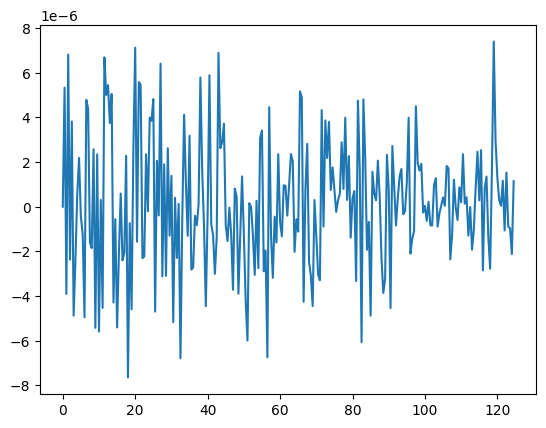

In [30]:
plt.plot(f,a[y==1].mean(axis=(0,1)))

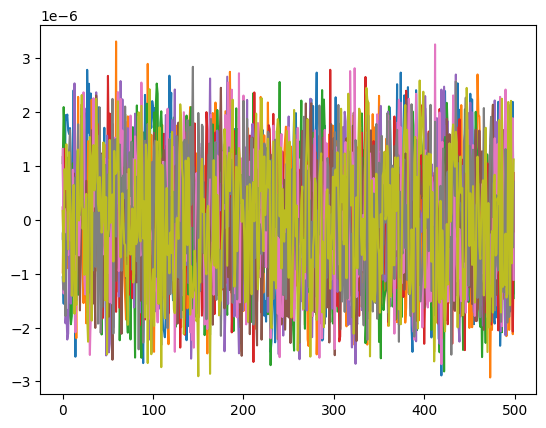

In [26]:
plt.plot(X_train[0].T)